In [1]:
import sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from importlib import reload
from sklearn import metrics

In [2]:
# Original data taken from txt files
x = np.genfromtxt("X_train.txt", delimiter = None)
y = np.genfromtxt("Y_train.txt", delimiter = None)
x_test = np.genfromtxt("X_test.txt", delimiter = None)

# Extract certain data out to be validation data
x_validation = x[10000:20000]
y_validation = y[10000:20000]

# Extract certain data out to be training data
x_train = x[0:10000]
y_train = y[0:10000]

In [6]:
minP = []
errTrain = []
errValidation = []
for i in range(1,101,10):
    adaBoost = AdaBoostClassifier(n_estimators=i*10)
    adaBoost.fit(x_train, y_train)
    minP.append(i*10)
    yhat_train = adaBoost.predict(x_train)
    yhat_val = adaBoost.predict(x_validation)
    errTrain.append(np.mean(yhat_train.reshape(y_train.shape) != y_train))
    errValidation.append(np.mean(yhat_val.reshape(y_validation.shape) != y_validation))

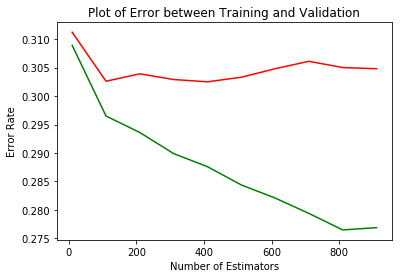

In [7]:
plt.title("Plot of Error between Training and Validation")
plt.xlabel("Number of Estimators")
plt.ylabel("Error Rate")
plt.plot(minP, errTrain, "g", minP, errValidation, "r")
plt.show()

In [9]:
adaBoost = AdaBoostClassifier(n_estimators=400)
adaBoost.fit(x_train, y_train)
yhat_train = adaBoost.predict_proba(x_train)
yhat_val = adaBoost.predict_proba(x_validation)

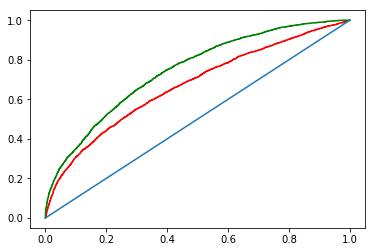

In [13]:
roc_tr = metrics.roc_curve(y_train, yhat_train[:,1])
roc_va = metrics.roc_curve(y_validation, yhat_val[:,1])
plt.plot(roc_va[0], roc_va[1], 'r', roc_tr[0], roc_tr[1], 'g')
plt.plot([0,1], [0,1])
plt.show()

In [14]:
print("AUC Validation: {:}".format(metrics.auc(roc_va[0], roc_va[1])))

AUC Validation: 0.6695698026158512


In [20]:
Ypred = adaBoost.predict(x_test)

In [21]:
np.savetxt('Yhat_adaBoost.txt',
    np.vstack( (np.arange(len(Ypred)) , Ypred) ).T,
    '%d, %.2f',header='ID,Prob1',comments='',delimiter=',');